In [1]:
#import numpy as np
import matplotlib.pyplot as plt
import autograd.numpy as np
from autograd import grad
from sklearn.linear_model import *
import sklearn.metrics as metrics

# Problem 6.13

In [2]:
def model(x, w):
    return w[0] + np.dot(x.T, w[1:])

def softmax(w):
    return np.sum(np.log(1 + np.exp(-y.flatten() * model(x, w)))) / np.size(y)

def perceptron(w):
    cost = 0
    xpTw = -y.flatten() * model(x, w)
    for i in range(xpTw.size):
        cost += np.max([0, xpTw[i]])
    return cost / np.size(y)

def classify(x, y, w):
    y_p = y.flatten()
    I = 0
    y_hat_p = np.sign(model(x, w))
    for i in range(y.size):
        if not np.isclose(y_hat_p[i], y_p[i]):
            I += 1
    return I

In [3]:
data = np.loadtxt("breast_cancer_data.csv", delimiter=',')
x, y = data[:-1, :], data[-1:, :]

In [4]:
w_soft = 3*np.ones(x.shape[0] + 1)
cost_soft = []
grad_softmax = grad(softmax)
for i in range(100):
    cost_soft.append(softmax(w_soft))
    w_soft -= 0.1 * grad_softmax(w_soft)

print("Number of mis-classifications: ", classify(x, y, w_soft))
print("Percent misclassified: %0.2f " % (100 * classify(x, y, w_soft) / y.size))

Number of mis-classifications:  45
Percent misclassified: 6.44 


Text(0.5, 1.0, 'Softmax Minimization')

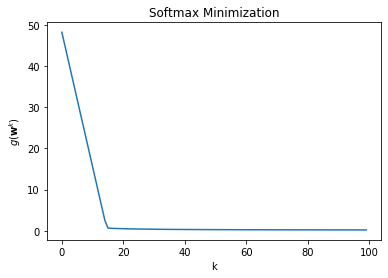

In [5]:
plt.plot(cost_soft)
plt.xlabel("k")
plt.ylabel("$g(\\mathbf{w}^k)$")
plt.title("Softmax Minimization")

In [6]:
w_per = 3*np.ones(x.shape[0] + 1)
cost_per = []
grad_percep = grad(perceptron)
for i in range(100):
    cost_per.append(perceptron(w_per))
    w_per -= 0.1 * grad_percep(w_per)

print("Number of mis-classifications: ", classify(x, y, w_per))
print("Percent misclassified: %0.2f " % (100 * classify(x, y, w_per) / y.size))

Number of mis-classifications:  33
Percent misclassified: 4.72 


Text(0.5, 1.0, 'Perceptron Minimization')

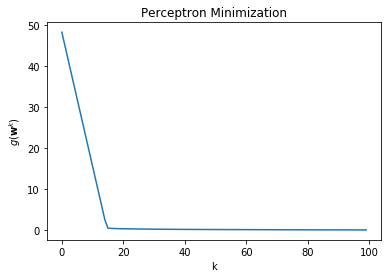

In [7]:
plt.plot(cost_per)
plt.xlabel("k")
plt.ylabel("$g(\\mathbf{w}^k)$")
plt.title("Perceptron Minimization")

# Problem 6.15

In [8]:
#Load and split the data
data = np.loadtxt("credit_dataset.csv", delimiter=',')

x, y = data[:-1, :], data[-1:, :]
print(x.shape, y.shape)

#Transform it via z-score
transformed = np.zeros(x.shape)

mean = np.nanmean(x, axis=1)
std = np.nanstd(x, axis=1)

for i in range(len(mean)):
    transformed[i, :] = (x[i, :] - mean[i]) / std[i]

(20, 1000) (1, 1000)


In [9]:
#Initialize the Perceptron fitter and fit our data
clf = Perceptron(max_iter=100000, early_stopping=True, fit_intercept=True, warm_start=True)
clf.fit(transformed.T, y.flatten())

Perceptron(alpha=0.0001, class_weight=None, early_stopping=True, eta0=1.0,
           fit_intercept=True, max_iter=100000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=True)

In [10]:
#Determine the predicted values
y_p_hat = clf.predict(transformed.T)

In [11]:
#Get elements of confusion matrix
A, B, C, D = metrics.confusion_matrix(y.T, y_p_hat).flatten()

In [12]:
#Print all the statistical metrics out using the confusion matrix
print("Accuracy of fit: %0.1f percent" % (100 * (A + D) / 1000))
print("----------------")
print("Good credit correctly predicted: ", D)
print("Good credit incorrectly predicted: ", C)
print("Good credit accuracy: %0.1f percent" % (100 * D / (C + D)))
print("----------------")
print("Bad credit correctly predicted: ", A)
print("Bad credit incorrectly predicted: ", B)
print("Bad credit accuracy: %0.1f percent" % (100 * A / (A + B)))

Accuracy of fit: 74.3 percent
----------------
Good credit correctly predicted:  576
Good credit incorrectly predicted:  124
Good credit accuracy: 82.3 percent
----------------
Bad credit correctly predicted:  167
Bad credit incorrectly predicted:  133
Bad credit accuracy: 55.7 percent


# Problem 6.16

In [13]:
data = np.loadtxt("3d_classification_data_v2_mbalanced.csv", delimiter=',')
x, y = data[:-1, :], data[-1:, :].flatten()

print(x.shape, y.shape)

(2, 55) (55,)


In [14]:
#Softmax regression with no penalty
clf = LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty='none')

In [15]:
#Equal weights and fit the data
beta = np.ones(y.shape)
clf.fit(x.T, y, sample_weight=beta)

#Determine the accuracy
y_hat_p = clf.predict(x.T)
A, B, C, D = metrics.confusion_matrix(y.T, y_hat_p).flatten()
print("Accuracy: %0.1f percent" % (100 * (A + D) / (A + B + C + D)))

Accuracy: 94.5 percent


Text(0.5, 0, '$w_1$')

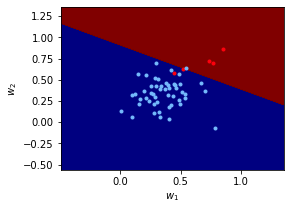

In [16]:
x_min, x_max = x[0, :].min() - .5, x[0, :].max() + .5
y_min, y_max = x[1, :].min() - .5, x[1, :].max() + .5

h = .001  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap='jet', alpha=0.1)
plt.plot(x[0, y==1], x[1, y==1], '.', color='xkcd:bright red')
plt.plot(x[0, y==-1], x[1, y==-1], '.', color='xkcd:sky blue')
plt.ylabel("$w_2$")
plt.xlabel("$w_1$")

In [17]:
#Red weights 5x higher than others
beta = np.ones(y.shape)
beta[y == 1] = 5.0
clf.fit(x.T, y, sample_weight=beta)

#Determine the accuracy
y_hat_p = clf.predict(x.T)
A, B, C, D = metrics.confusion_matrix(y.T, y_hat_p).flatten()
print("Accuracy: %0.1f percent" % (100 * (A + D) / (A + B + C + D)))

Accuracy: 92.7 percent


Text(0.5, 0, '$w_1$')

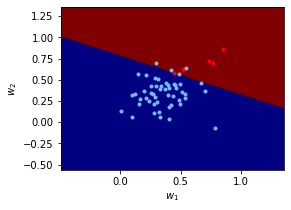

In [18]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap='jet', alpha=0.1)
plt.plot(x[0, y==1], x[1, y==1], '.', color='xkcd:bright red')
plt.plot(x[0, y==-1], x[1, y==-1], '.', color='xkcd:sky blue')
plt.ylabel("$w_2$")
plt.xlabel("$w_1$")

In [19]:
#Red weights 10x higher than others
beta = np.ones(y.shape)
beta[y == 1] = 10.0
clf.fit(x.T, y, sample_weight=beta)

#Get the accuracy
y_hat_p = clf.predict(x.T)
A, B, C, D = metrics.confusion_matrix(y.T, y_hat_p).flatten()
print("Accuracy: %0.1f percent" % (100 * (A + D) / (A + B + C + D)))

Accuracy: 90.9 percent


Text(0.5, 0, '$w_1$')

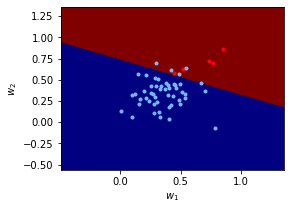

In [20]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap='jet', alpha=0.1)
plt.plot(x[0, y==1], x[1, y==1], '.', color='xkcd:bright red')
plt.plot(x[0, y==-1], x[1, y==-1], '.', color='xkcd:sky blue')
plt.ylabel("$w_2$")
plt.xlabel("$w_1$")